# Import packages and set SQL cursor

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import os
%matplotlib inline

conn = sqlite3.connect('movies_db.sqlite')
cur = conn.cursor()

## Adjust view space

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Bring in data from our SQL database

## Creating our Countries per Movie DataFrame

In [13]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('bom_movie_gross',),
 ('imdb_name_basics',),
 ('imdb_title_akas',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('tmdb_movies',),
 ('tn_movie_budgets',)]

In [82]:
cur.execute('''SELECT *
               FROM imdb_title_akas
               ;''')
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]

df1.dropna(subset=['region'])
df1['region'] = df1['region'].map(lambda x: [x])
print(type(df1['region'].iloc[0]))

df1.groupby('title_id')['region'].sum()

<class 'list'>


title_id
tt0063540                               [IN, None, IN, IN, IN]
tt0066787                                [XWW, IN, None, None]
tt0069049    [VE, PL, DE, PT, BR, US, GB, IT, RU, AR, ES, N...
tt0069204                                       [IN, IN, None]
tt0100275                              [None, XWW, CL, CL, PL]
tt0111414                                                 [AU]
tt0112502                                                 [US]
tt0137204                               [CA, None, None, None]
tt0139613                                                 [PT]
tt0144449                                                 [NL]
tt0146592                           [PL, BG, HR, HU, SE, None]
tt0154039                          [None, HU, FR, XWW, FR, PL]
tt0159369                                     [None, None, US]
tt0162942                                  [PL, HU, None, XWW]
tt0176694                                  [HU, RO, None, XWW]
tt0187902                                     

In [203]:
cur.execute('''SELECT primary_title, region
                FROM imdb_title_akas a
                JOIN imdb_title_basics b
                ON a.title_id = b.tconst
                ;''')
df_country = pd.DataFrame(cur.fetchall())
df_country.columns = [x[0] for x in cur.description]
df_country.head()

,primary_title,region
0,Sunghursh,IN
1,Sunghursh,None
2,Sunghursh,IN
3,Sunghursh,IN
4,Sunghursh,IN


## Creating our Movie Budgets and Revenues DataFrame 

In [202]:
cur.execute('''SELECT * 
                FROM tn_movie_budgets
                ;''')
df_finance = pd.DataFrame(cur.fetchall())
df_finance.columns = [x[0] for x in cur.description]
df_finance.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

## Cleaning & Counting - Countries per Movie

In [205]:
df_country_list = df_country.groupby('primary_title')['region'].apply(list).reset_index(name='country_list')
df_country_list.head()

,primary_title,country_list
0,!Women Art Revolution,"[XWW, RU, US]"
1,#1 Serial Killer,[US]
2,#5,[US]
3,#50Fathers,[US]
4,#66,[ID]


In [215]:
df_country_list['country_count'] = [len(x) for x in df_country_list['country_list']]
df_country_list.head()

,primary_title,country_list,country_count
0,!Women Art Revolution,"[XWW, RU, US]",3
1,#1 Serial Killer,[US],1
2,#5,[US],1
3,#50Fathers,[US],1
4,#66,[ID],1


In [233]:
df_country_list_dom = df_country_list_complete[
    df_country_list_complete[
        'country_count'
    ] == 1
]

df_country_list_dom = df_country_list_dom.drop('country_count', axis=1)
df_country_list_dom['movies_per_country'] = 1
df_country_list_dom['country_list'] = df_country_list_dom['country_list'].map(lambda x: ''.join(x))
df_country_list_dom.groupby('country_list').sum()

,movies_per_country
country_list,
AD,2
AE,53
AF,27
AG,8
AI,1
AL,27
AM,35
AN,3
AO,9


In [209]:
df_country_list_int = df_country_list_complete[
    df_country_list_complete[
        'country_count'
    ] > 1
]

df_country_list_int.head()

,country_count,country_list
primary_title,,
!Women Art Revolution,3,"[XWW, RU, US]"
#Bicyclediary,2,"[FI, XWW]"
#Female Pleasure,5,"[LT, PL, DE, CH, ES]"
#FollowFriday,3,"[US, FR, BR]"
#Horror,4,"[US, XWW, US, RU]"


In [18]:
df_country.keys()

Index(['Frozen', 'Home', 'Beauty and the Beast', 'The Family', 'Star Wars: Episode VII - The Force Awakens', 'Inside Out', 'Robin Hood', 'Harry Potter and the Deathly Hallows: Part 2', 'The Hobbit: The Battle of the Five Armies', 'The Nun',
       ...
       'Mr. Pride vs. Miss Prejudice', 'My Sassy Girl 2', 'Break Up Club', 'My Original Dream', 'My Own Swordsman', 'My Mongolian Mother', 'The Caring City', 'My Spectacular Theatre', 'My Old Classmate', 'Honor'], dtype='object', name='primary_title', length=38049)

In [36]:
int_movie_counter = {}

int_movie_counter['movie'] = df_country.keys()
count_list = []

for movie in df_country.keys():
    count_list.append(df_country[movie]['country_count'])    
    
int_movie_counter['country_count'] = count_list
      
df_country_counts = pd.DataFrame.from_dict(int_movie_counter)
print(df_country_counts.info())
df_country_counts
# ['country_count'].value_counts().sort_values(ascending=False).plot.barh(figsize=(15,15));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38049 entries, 0 to 38048
Data columns (total 2 columns):
movie            38049 non-null object
country_count    38049 non-null float64
dtypes: float64(1), object(1)
memory usage: 594.6+ KB
None


,movie,country_count
0,Frozen,78.0
1,Home,71.0
2,Beauty and the Beast,65.0
3,The Family,62.0
4,Star Wars: Episode VII - The Force Awakens,59.0
5,Inside Out,56.0
6,Robin Hood,55.0
7,Harry Potter and the Deathly Hallows: Part 2,54.0
8,The Hobbit: The Battle of the Five Armies,54.0
9,The Nun,52.0


## Cleaning and Counting - Domestic and International Profits

In [62]:
print(df_finance.info())
df_finance.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [64]:
# def column_string_cleaner (df, column_name, dtype, to_replace=None, new_value=None):
    
#     '''This function cleans and converts any column, or list of columns, within 
#     a given DataFrame. This function takes in a DataFrame object, a column name 
#     (or list of column names), the desired output dtype, to_replace values, 
#     as well as new_values.'''
    
#     if type(to_replace) == list:
#         for i in range(len(to_replace)):
#             df[column_name].str.replace(to_replace[i], new_value[i])
#             print('Line #1')
#         df[column_name].astype(dtype)
# #     elif type(to_replace) == list and type(new_value) != list:
# #         for i in range(len(to_replace)):
# #             df[column_name].str.replace(to_replace[i], new_value)
# #             print('Line # 2')
# #         df[column_name].astype(dtype)
#     else:
#         df[column_name].str.replace(to_replace, new_value).astype(dtype)
#         print('Line #3')
#     return df

# column_string_cleaner(df2, 'worldwide_gross', float, to_replace=['$',','], new_value=['',''])


df_finance['worldwide_gross'] = df_finance['worldwide_gross'].str.replace('$', '').str.replace(',','').astype(float)
df_finance['production_budget'] = df_finance['production_budget'].str.replace('$', '').str.replace(',','').astype(float)
df_finance['domestic_gross'] = df_finance['domestic_gross'].str.replace('$', '').str.replace(',','').astype(float)


df_finance

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08


<class 'list'>
<class 'pandas.core.series.Series'>
worked
<class 'list'>
<class 'pandas.core.series.Series'>
worked
<class 'list'>
<class 'pandas.core.series.Series'>
worked
<class 'list'>
<class 'pandas.core.series.Series'>
worked
<class 'list'>
<class 'pandas.core.series.Series'>
worked
<class 'list'>
<class 'pandas.core.series.Series'>
worked
<class 'list'>
<class 'pandas.core.series.Series'>
worked


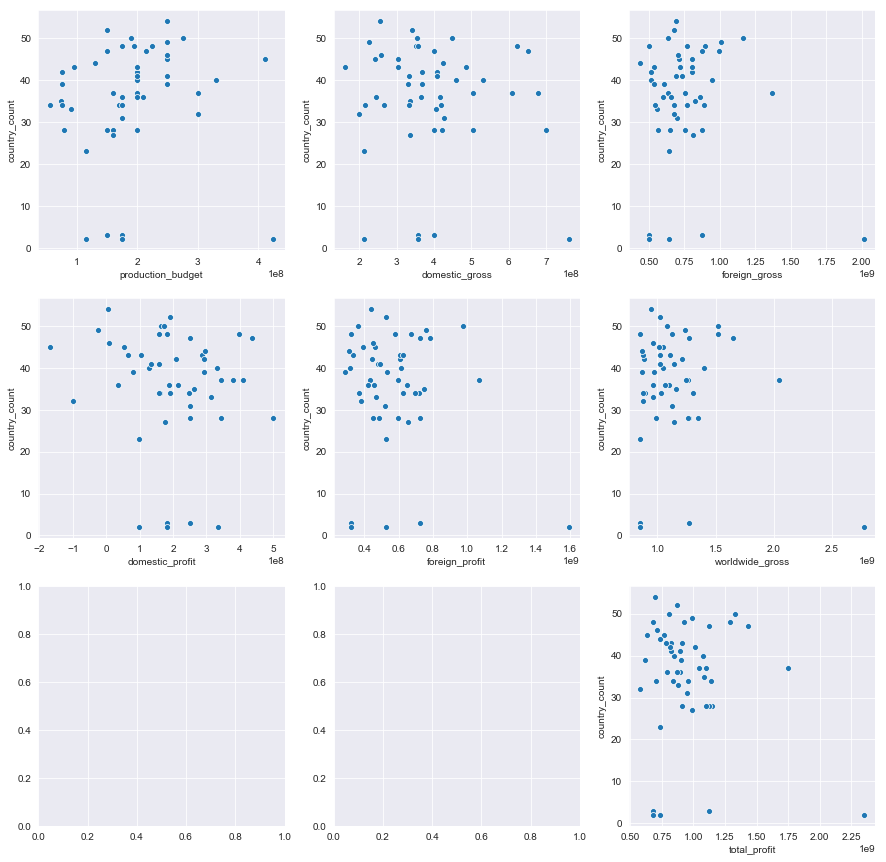

In [219]:

df2 = df2.sort_values('worldwide_gross', ascending=False).iloc[:200]

df2['foreign_gross'] = df2['worldwide_gross'] - df2['domestic_gross']
df2['domestic_profit'] = df2['domestic_gross'] - df2['production_budget']
df2['foreign_profit'] = df2['foreign_gross'] - df2['production_budget']
df2['total_profit'] = df2['worldwide_gross'] - df2['production_budget']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

y = df2['country_count']
x = [df2['production_budget'], df2['domestic_gross'], df2['foreign_gross'],
     df2['worldwide_gross'], df2['domestic_profit'], df2['foreign_profit'],
     df2['total_profit']]
z = ['production_budget', 'domestic_gross', 'foreign_gross',
     'worldwide_gross', 'domestic_profit', 'foreign_profit',
     'total_profit']

for n in range(1,8):
    row = (n-1)//3
    col = n%4-1
    ax = axes[row][col]
    x1 = x[n-1]
    print(type(x))
    print(type(y))
    sns.set_style('darkgrid')
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    sns.scatterplot(x1, y, ax=ax)
    print('worked')

# df2
# df2.plot.scatter(x=['total_profit'], y=['country_count'], figsize=(15,15), ax =axes);

In [111]:
# country_counts = country_counts.merge(movie_titles, on='tconst')
country_counts['country_count'].replace(5,1)
# .join(movie_money, how='inner', on='primary_title', rsuffix='*')
# pd.concat([country_counts, movie_money], axis=1, join='inner', ignore_index=True)

0        59.0
1        54.0
2        54.0
3        52.0
4        52.0
5        52.0
6        50.0
7        50.0
8        50.0
9        50.0
10       50.0
11       50.0
12       49.0
13       49.0
14       48.0
15       48.0
16       48.0
17       48.0
18       48.0
19       48.0
20       47.0
21       47.0
22       47.0
23       47.0
24       47.0
25       47.0
26       46.0
27       46.0
28       46.0
29       45.0
30       45.0
31       45.0
32       45.0
33       45.0
34       45.0
35       44.0
36       44.0
37       44.0
38       44.0
39       44.0
40       44.0
41       44.0
42       43.0
43       43.0
44       43.0
45       43.0
46       43.0
47       43.0
48       43.0
49       43.0
50       43.0
51       43.0
52       43.0
53       42.0
54       42.0
55       42.0
56       42.0
57       42.0
58       42.0
59       42.0
60       42.0
61       42.0
62       42.0
63       41.0
64       41.0
65       41.0
66       41.0
67       41.0
68       41.0
69       41.0
70       41.0
71    